### MovieLens dataset 분석 (2)

In [25]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [14]:
path = './ml-latest-small/'
ratings_df = pd.read_csv(os.path.join(path + 'ratings.csv'), encoding='utf-8')
tags_df = pd.read_csv(os.path.join(path + 'tags.csv'), encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path + 'movies.csv'),
                        index_col='movieId', encoding='utf-8')

#### 장르 분석을 위한 전처리 과정

In [3]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
all_genres = [x.split('|') for x in movies_df['genres'].values]
print(all_genres)

In [5]:
import itertools
genres = list(set(list(itertools.chain(*all_genres))))
print(len(all_genres))
print(len(genres))
print(genres)

9742
20
['Western', 'War', 'Thriller', 'Film-Noir', 'Romance', 'IMAX', 'Fantasy', 'Drama', 'Horror', '(no genres listed)', 'Children', 'Documentary', 'Musical', 'Mystery', 'Action', 'Adventure', 'Crime', 'Animation', 'Comedy', 'Sci-Fi']


In [6]:
genres_df = pd.DataFrame(columns=genres, index=movies_df.index)
genres_df.head()

,Western,War,Thriller,Film-Noir,Romance,IMAX,Fantasy,Drama,Horror,(no genres listed),Children,Documentary,Musical,Mystery,Action,Adventure,Crime,Animation,Comedy,Sci-Fi
movieId,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for i, row in genres_df.iterrows():
    movie_id = row.name
    list_of_genres = movies_df.loc[movie_id]['genres'].split('|')
    genres_df.loc[movie_id][list_of_genres] = 1
genres_df = genres_df.fillna(0)
genres_df['num_genres'] = genres_df.sum(axis=1)

print(genres_df.shape)
print(genres_df)

(9742, 21)
         Western  War  Thriller  Film-Noir  Romance  IMAX  Fantasy  Drama  \
movieId                                                                     
1              0    0         0          0        0     0        1      0   
2              0    0         0          0        0     0        1      0   
3              0    0         0          0        1     0        0      0   
4              0    0         0          0        1     0        0      1   
5              0    0         0          0        0     0        0      0   
...          ...  ...       ...        ...      ...   ...      ...    ...   
193581         0    0         0          0        0     0        1      0   
193583         0    0         0          0        0     0        1      0   
193585         0    0         0          0        0     0        0      1   
193587         0    0         0          0        0     0        0      0   
193609         0    0         0          0        0     0        

In [10]:
genres_df = movies_df['genres'].str.get_dummies(sep='|')
genres_df['num_genres'] = genres_df.sum(axis=1)

print(genres_df.shape)
print(genres_df)

(9742, 21)
         (no genres listed)  Action  Adventure  Animation  Children  Comedy  \
movieId                                                                       
1                         0       0          1          1         1       1   
2                         0       0          1          0         1       0   
3                         0       0          0          0         0       1   
4                         0       0          0          0         0       1   
5                         0       0          0          0         0       1   
...                     ...     ...        ...        ...       ...     ...   
193581                    0       1          0          1         0       1   
193583                    0       0          0          1         0       1   
193585                    0       0          0          0         0       0   
193587                    0       1          0          1         0       0   
193609                    0       0      

In [15]:
movies_df = pd.concat([movies_df, genres_df], axis=1)

print(movies_df.head())

                                      title  \
movieId                                       
1                          Toy Story (1995)   
2                            Jumanji (1995)   
3                   Grumpier Old Men (1995)   
4                  Waiting to Exhale (1995)   
5        Father of the Bride Part II (1995)   

                                              genres  (no genres listed)  \
movieId                                                                    
1        Adventure|Animation|Children|Comedy|Fantasy                   0   
2                         Adventure|Children|Fantasy                   0   
3                                     Comedy|Romance                   0   
4                               Comedy|Drama|Romance                   0   
5                                             Comedy                   0   

         Action  Adventure  Animation  Children  Comedy  Crime  Documentary  \
movieId                                                   

In [16]:
movies_df.drop('genres', axis=1, inplace=True)

print(movies_df.head())

                                      title  (no genres listed)  Action  \
movieId                                                                   
1                          Toy Story (1995)                   0       0   
2                            Jumanji (1995)                   0       0   
3                   Grumpier Old Men (1995)                   0       0   
4                  Waiting to Exhale (1995)                   0       0   
5        Father of the Bride Part II (1995)                   0       0   

         Adventure  Animation  Children  Comedy  Crime  Documentary  Drama  \
movieId                                                                      
1                1          1         1       1      0            0      0   
2                1          0         1       0      0            0      0   
3                0          0         0       1      0            0      0   
4                0          0         0       1      0            0      1   
5     

#### 특정 장르의 평점과 user 분석

In [17]:
movies_df.columns

Index(['title', '(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'num_genres'],
      dtype='object')

In [18]:
animation_movieId_list = movies_df['title'][movies_df.Animation == 1]
animation_movieId_list.index

Int64Index([     1,     13,     48,    239,    313,    364,    551,    558,
               588,    594,
            ...
            182639, 183897, 187541, 190219, 193565, 193567, 193573, 193581,
            193583, 193587],
           dtype='int64', name='movieId', length=611)

In [20]:
animation_df = ratings_df[ratings_df['movieId'].isin(animation_movieId_list.index)]
animation_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
35,1,596,5.0,964982838
38,1,661,5.0,964982838
39,1,673,3.0,964981775
50,1,1023,5.0,964982681
...,...,...,...,...
100798,610,146309,4.0,1493850187
100805,610,149406,3.5,1479542295
100808,610,152081,4.0,1493846503
100813,610,157296,4.0,1493846563


In [23]:
animation_df.groupby('userId')['rating'].mean().sort_values(ascending=False)

userId
71     5.0
515    5.0
543    5.0
535    5.0
533    5.0
      ... 
416    0.5
418    0.5
3      0.5
55     0.5
127    0.5
Name: rating, Length: 527, dtype: float64

#### 장르간의 상관관계 분석

In [24]:
genres_df.corr()
# 1에 가까울수록 상관관계가 높고 -1에 가까울수록 상관관계가 낮다

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,...,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816,-0.066751
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,...,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600,0.420903
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,...,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136,0.432018
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,...,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378,0.298507
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,...,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890,0.286041
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,...,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622,0.041229
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,...,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997,0.277350
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,...,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915,-0.190304
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,...,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060,0.066920
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,...,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441,0.354829


<AxesSubplot:>

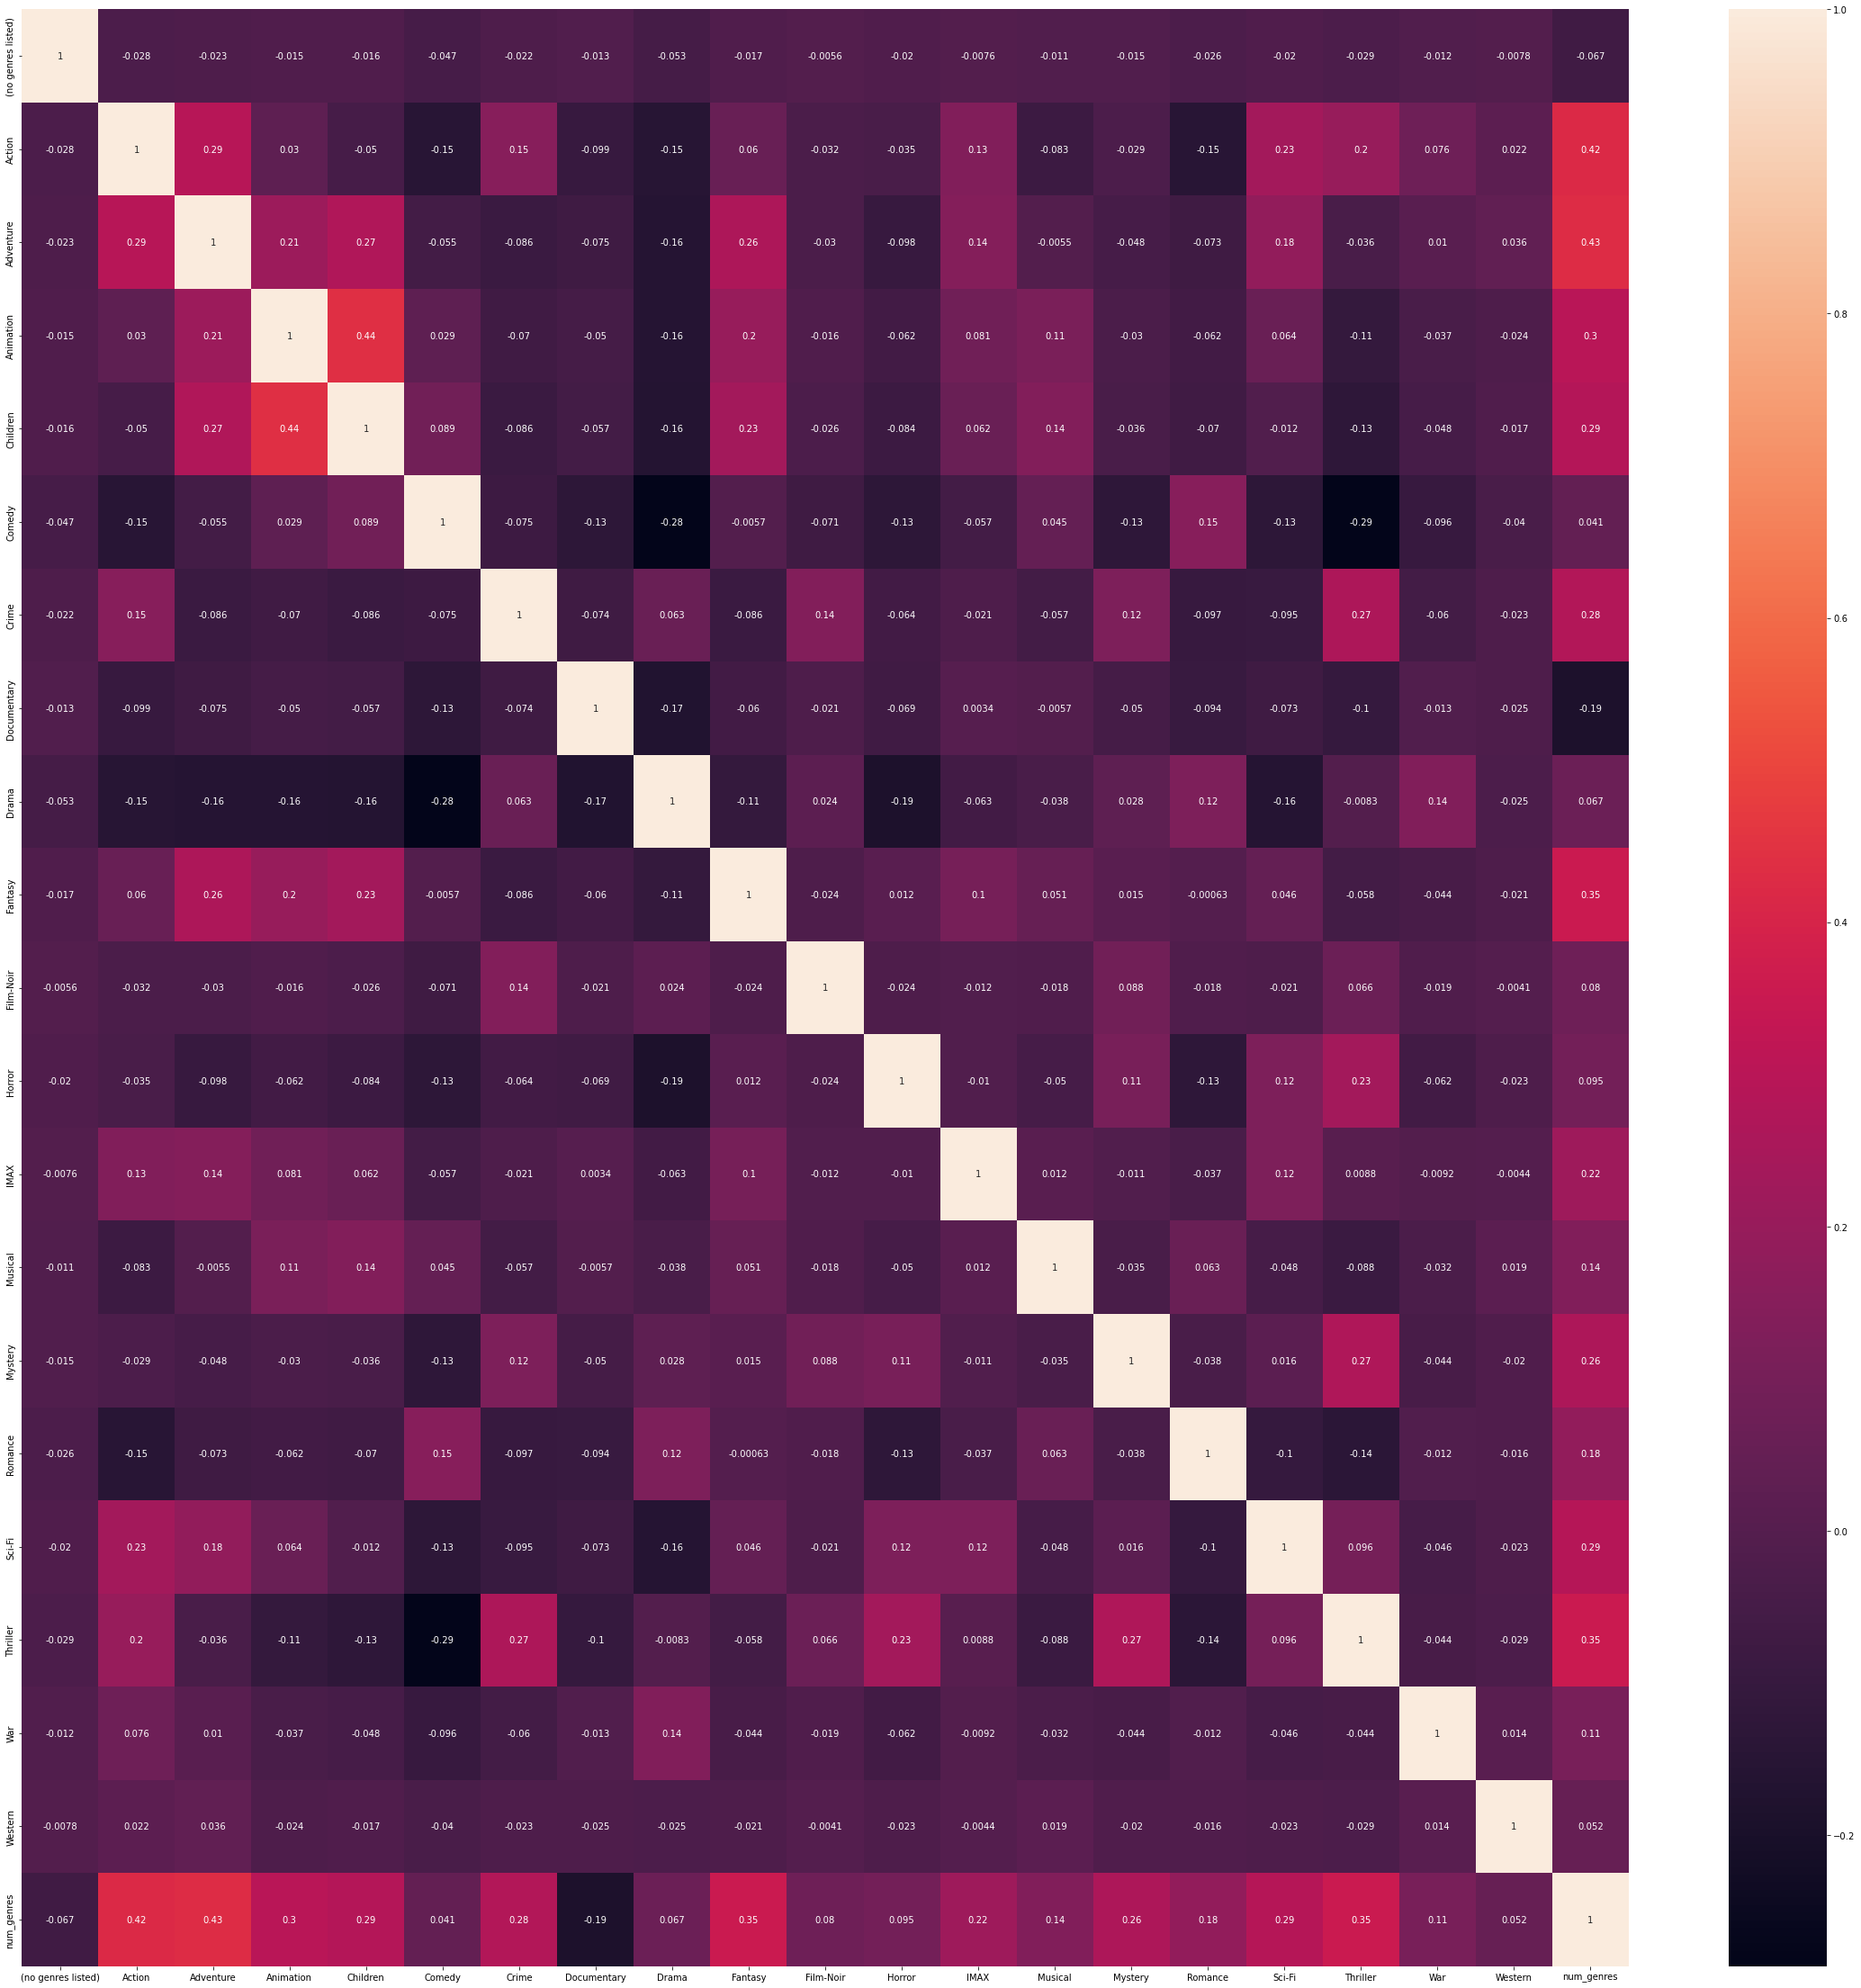

In [26]:
plt.figure(figsize=(40, 40))
sns.heatmap(genres_df.corr(), annot=True)

#### 영화 이름, 연도 분석

In [36]:
movies_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,2
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,3
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
title_df = movies_df.copy()
title_df['year'] = title_df['title'].str.extract('(\(\d\d\d\d\))')
# python 정규식 표현 활용
title_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,5,(1995)
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,(1995)
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,2,(1995)
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,3,(1995)
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,(1995)


In [38]:
title_df.isna().sum()

title                  0
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
num_genres             0
year                  13
dtype: int64

In [39]:
title_df[title_df['year'].isnull()]

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres,year
movieId,,,,,,,,,,,,,,,,,,,,,
40697,Babylon 5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,NaN
140956,Ready Player One,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,3,NaN
143410,Hyena Road,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
147250,The Adventures of Sherlock Holmes and Doctor W...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
149334,Nocturnal Animals,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,2,NaN
156605,Paterson,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
162414,Moonlight,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,NaN
167570,The OA,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
171495,Cosmos,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN


In [40]:
title_df[title_df['(no genres listed)'] == 1].shape

(34, 23)

In [41]:
title_df.dropna(axis=0, inplace=True)
title_df['year'] = title_df['year'].apply(lambda x: x.replace('(', '').replace(')', ''))
title_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,num_genres,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,5,1995
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1995
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,2,1995
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,3,1995
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1995


#### 연도별 영화 데이터 분석

In [47]:
year_freq_df = pd.DataFrame(title_df.groupby('year')['title'].count().sort_values(ascending=False))
year_freq_df

,title
year,
2002,311
2006,295
2001,294
2007,284
2000,283
...,...
1919,1
1917,1
1915,1


In [45]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [50]:
title_df[title_df['year'] == '2007'].index

Int64Index([ 49910,  50158,  50440,  50442,  50445,  50601,  50685,  50796,
             50798,  50800,
            ...
            134184, 136443, 139130, 139511, 143031, 147382, 147384, 151763,
            153236, 173963],
           dtype='int64', name='movieId', length=284)

In [53]:
ratings_df[ratings_df['movieId'].isin(
    title_df[title_df['year'] == '2007'].index)]['rating'].describe()


count    2318.000000
mean        3.522433
std         0.979138
min         0.500000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

In [55]:
ratings_df['rating'][ratings_df['movieId'].isin(
    title_df[title_df['year'] == '2007'].index)].describe()


count    2318.000000
mean        3.522433
std         0.979138
min         0.500000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

In [59]:
results = []
for year in title_df['year'].unique():
    avg_ratings = ratings_df['rating'][ratings_df['movieId'].isin(
        title_df[title_df['year'] == year].index)].mean()
    results.append((year, avg_ratings))
    
result_df = pd.DataFrame(results, columns=['year', 'avg_rating'])
result_df.sort_values(by='year', ascending=False)


,year,avg_rating
104,2018,3.483516
103,2017,3.578091
102,2016,3.387261
101,2015,3.410386
100,2014,3.512879
...,...,...
87,1916,3.600000
84,1915,2.000000
105,1908,4.000000
92,1903,2.500000


array([[<AxesSubplot:title={'center':'avg_rating'}>]], dtype=object)

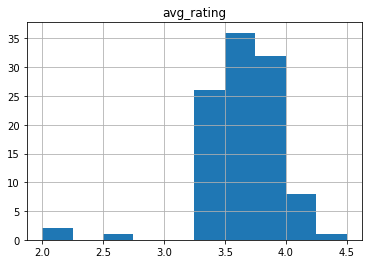

In [60]:
result_df.hist()